In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as sm
from statsmodels.api import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm
from sklearn import metrics

In [111]:
df = pd.read_csv('D:\\Supervised Learning Regression\\parole1.1.csv')
df.tail()

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
733,1,2,33.4,3,11.2,12,1,1,1
734,1,2,29.3,3,1.4,12,1,1,1
735,1,1,31.4,3,2.9,12,1,1,1
736,1,2,20.6,3,12.0,8,1,3,1
737,0,2,28.8,3,14.9,12,0,1,1


In [112]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

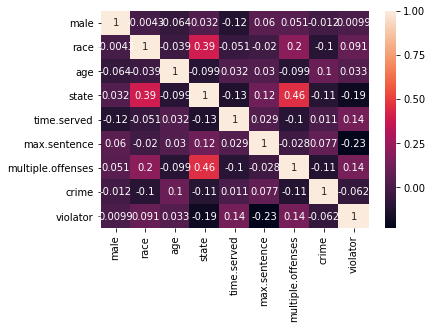

In [113]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [114]:
x = df.drop('violator',axis = 1)
y = df['violator']
print(x.head())

   male  race   age  state  time.served  max.sentence  multiple.offenses  \
0     1     1  33.2      1          5.5            18                  0   
1     0     1  39.7      1          5.4            12                  0   
2     1     2  29.5      1          5.6            12                  0   
3     1     1  22.4      1          5.7            18                  0   
4     1     2  21.6      1          5.4            12                  0   

   crime  
0      4  
1      3  
2      3  
3      1  
4      1  


In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [116]:
lr = LogisticRegression()

In [117]:
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
a_train = pd.crosstab(y_train,pred_train)
a_train

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


col_0,0,1
violator,,
0,409,16
1,70,21


In [118]:
pred_test = lr.predict(x_test)
a_test = pd.crosstab(y_test,pred_test)
a_test

col_0,0,1
violator,,
0,167,5
1,39,11


In [119]:
TN = a_test[0][0]
FN = a_test[0][1]
FP = a_test[1][0]
TP = a_test[1][1]
Total = a_test.sum().sum()
acc_test = (TP + TN) / Total
print(' Accuracy :',acc_test)
err_test = (FP + FN) / Total
print('\n Error :',err_test)
sens_test = (TP / (TP + FN))
print('\n Sensitivity :',sens_test)
precision_test = (TP) / (TP + FP)
print('\n Precision :',precision_test)
specificity_test = (TN) / (TN + FP)
print('\n Specificity :',specificity_test)

 Accuracy : 0.8018018018018018

 Error : 0.1981981981981982

 Sensitivity : 0.22

 Precision : 0.6875

 Specificity : 0.9709302325581395


In [120]:
df['state'] = df['state'].astype('category')
df['crime'] = df['crime'].astype('category')
df['male'] = df['male'].astype('category')
df['race'] = df['race'].astype('category')

In [121]:
df_new = pd.get_dummies(df,drop_first = True)
df_new.head()

,age,time.served,max.sentence,multiple.offenses,violator,male_1,race_2,state_2,state_3,state_4,crime_2,crime_3,crime_4
0,33.2,5.5,18,0,0,1,0,0,0,0,0,0,1
1,39.7,5.4,12,0,0,0,0,0,0,0,0,1,0
2,29.5,5.6,12,0,0,1,1,0,0,0,0,1,0
3,22.4,5.7,18,0,0,1,0,0,0,0,0,0,0
4,21.6,5.4,12,0,0,1,1,0,0,0,0,0,0


In [122]:
x1 = df_new.drop('violator',axis = 1)
y1 = df_new['violator']
print(x1.head())

    age  time.served  max.sentence  multiple.offenses  male_1  race_2  \
0  33.2          5.5            18                  0       1       0   
1  39.7          5.4            12                  0       0       0   
2  29.5          5.6            12                  0       1       1   
3  22.4          5.7            18                  0       1       0   
4  21.6          5.4            12                  0       1       1   

   state_2  state_3  state_4  crime_2  crime_3  crime_4  
0        0        0        0        0        0        1  
1        0        0        0        0        1        0  
2        0        0        0        0        1        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  


In [123]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size = 0.3,random_state = 1)

In [124]:
lr.fit(x_train1,y_train1)
pred_train1 = lr.predict(x_train1)
a_train1 = pd.crosstab(y_train1,pred_train1)
a_train1

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


col_0,0,1
violator,,
0,408,17
1,50,41


In [125]:
pred_test1 = lr.predict(x_test1)
a_test1 = pd.crosstab(y_test1,pred_test1)
a_test1

col_0,0,1
violator,,
0,168,4
1,28,22


In [126]:
TN1 = a_test1[0][0]
FN1 = a_test1[0][1]
FP1 = a_test1[1][0]
TP1 = a_test1[1][1]
Total1 = a_test1.sum().sum()
acc_test1 = (TP1 + TN1) / Total1
print(' Accuracy :',acc_test1)
err_test1 = (FP1 + FN1) / Total1
print('\n Error :',err_test1)
sens_test1 = (TP1 / (TP1 + FN1))
print('\n Sensitivity :',sens_test1)
precision_test1 = (TP1) / (TP1 + FP1)
print('\n Precision :',precision_test1)
specificity_test1 = (TN1) / (TN1 + FP1)
print('\n Specificity :',specificity_test1)

 Accuracy : 0.8558558558558559

 Error : 0.14414414414414414

 Sensitivity : 0.44

 Precision : 0.8461538461538461

 Specificity : 0.9767441860465116


In [127]:
x2 = add_constant(x_train1)
logit = sm.Logit(y_train1,x2)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.310934
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               violator   No. Observations:                  516
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                           12
Date:                Sun, 30 Dec 2018   Pseudo R-squ.:                  0.3325
Time:                        12:43:53   Log-Likelihood:                -160.44
converged:                       True   LL-Null:                       -240.36
                                        LLR p-value:                 5.646e-28
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.2574      0.995     -4.277      0.000      -6.209      -2.306
age     

In [128]:
pred_1 = lr.predict_proba(x_test1)
#pred_2 = lr.predict_proba(x_train1)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(-0.05, 1.05)

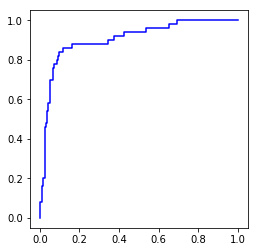

In [129]:
fpr,tpr,threshold = metrics.roc_curve(y_test1,pred_1[:,1])
plt.plot(fpr,tpr,label = 'Roc curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [130]:
AUC = metrics.auc(fpr,tpr)
AUC

0.9049999999999999

# Trying After Droping the Age column

In [131]:
x3 = df_new.drop(['violator','age'],axis = 1)
y3 = df_new['violator']
print(x3.head())

   time.served  max.sentence  multiple.offenses  male_1  race_2  state_2  \
0          5.5            18                  0       1       0        0   
1          5.4            12                  0       0       0        0   
2          5.6            12                  0       1       1        0   
3          5.7            18                  0       1       0        0   
4          5.4            12                  0       1       1        0   

   state_3  state_4  crime_2  crime_3  crime_4  
0        0        0        0        0        1  
1        0        0        0        1        0  
2        0        0        0        1        0  
3        0        0        0        0        0  
4        0        0        0        0        0  


In [132]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size = 0.3,random_state = 1)

In [133]:
lr.fit(x_train3,y_train3)
pred_train3 = lr.predict(x_train3)
a_train3 = pd.crosstab(y_train3,pred_train3)
a_train3

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


col_0,0,1
violator,,
0,408,17
1,50,41


In [149]:
pred_test3 = lr.predict_proba(x_test3)
predlist = []
for i in pred_test3[:,1]:
    if i>=0.5:
        predlist.append(1)
    else:
        predlist.append(0)
pred_3_test = np.array(predlist)
a_test3 = pd.crosstab(y_test3,pred_3_test)
a_test3

col_0,0,1
violator,,
0,168,4
1,29,21


In [150]:
TN3 = a_test3[0][0]
FN3 = a_test3[0][1]
FP3 = a_test3[1][0]
TP3 = a_test3[1][1]
Total3 = a_test3.sum().sum()
acc_test3 = (TP3 + TN3) / Total3
print(' Accuracy :',acc_test3)
err_test3 = (FP3 + FN3) / Total3
print('\n Error :',err_test3)
sens_test3 = (TP3 / (TP3 + FN3))
print('\n Sensitivity :',sens_test3)
precision_test3 = (TP3) / (TP3 + FP3)
print('\n Precision :',precision_test3)
specificity_test3 = (TN3) / (TN3 + FP3)
print('\n Specificity :',specificity_test3)

 Accuracy : 0.8513513513513513

 Error : 0.14864864864864866

 Sensitivity : 0.42

 Precision : 0.84

 Specificity : 0.9767441860465116


In [151]:
x_ = add_constant(x_train3)
logit1 = sm.Logit(y_train3,x_)
result1 = logit1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.311126
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               violator   No. Observations:                  516
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                           11
Date:                Sun, 30 Dec 2018   Pseudo R-squ.:                  0.3321
Time:                        13:06:25   Log-Likelihood:                -160.54
converged:                       True   LL-Null:                       -240.36
                                        LLR p-value:                 1.580e-28
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.0326      0.854     -4.722      0.000      -5.707      -2.359
time.ser

In [152]:
pred_1_ = lr.predict_proba(x_test3)
pred_2_ = lr.predict_proba(x_train3)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(-0.05, 1.05)

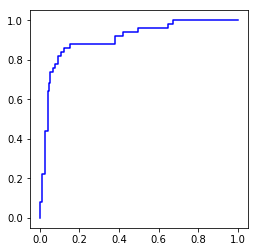

In [153]:
fpr1,tpr1,threshold1 = metrics.roc_curve(y_test3,pred_1_[:,1])
plt.plot(fpr1,tpr1,label = 'Roc curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [154]:
AUC1 = metrics.auc(fpr,tpr)
AUC1

0.9062790697674419